In [4]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [10]:
data = pd.read_csv('./data/cleveland_short.csv')
print(data.head())
print(data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   fbs       282 no

In [11]:
#Class construite pour étudier et analyser l'architecture de notre dataset
class sr_value:
    def __init__(self,data):
        self.dt=data
        
    #Valeurs prises par chaque feature     
    def pos_value(self):
        for i in self.dt.columns:
            print(f'* la colonne {i} a comme valeur possible{self.dt[i].unique()}')
            print('\n')
            
    #distribution des valeurs ordinal feature 
    def ct_ord_value(self,ord_val):
        for i in ord_val:
            print(f' La variable ordinale {i} a comme distibution de ces valeurs le schéma suivant :\n {self.dt[i].value_counts()}')
            print('\n')
        
    #Nombre de valeur pour chaque attribut
    def ct_value(self):
        for i in self.dt.columns:
            print(f'* La colonne {i} a comme valeurs possibles : {len(self.dt[i].unique())}')
            print('\n')

In [18]:
# On renomme nos features par le nom au complet

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','num']
data_architecture=sr_value(data)
#Regardons le nombre de valeurs prises de nos features
data_architecture.ct_value()

* La colonne age a comme valeurs possibles : 41


* La colonne sex a comme valeurs possibles : 2


* La colonne chest_pain_type a comme valeurs possibles : 4


* La colonne resting_blood_pressure a comme valeurs possibles : 48


* La colonne cholesterol a comme valeurs possibles : 145


* La colonne fasting_blood_sugar a comme valeurs possibles : 2


* La colonne rest_ecg a comme valeurs possibles : 3


* La colonne max_heart_rate_achieved a comme valeurs possibles : 90


* La colonne exercise_induced_angina a comme valeurs possibles : 2


* La colonne st_depression a comme valeurs possibles : 39


* La colonne st_slope a comme valeurs possibles : 3


* La colonne nb_vessels a comme valeurs possibles : 5


* La colonne thal a comme valeurs possibles : 4


* La colonne num a comme valeurs possibles : 5




In [19]:
cat_values=['chest_pain_type','rest_ecg','st_slope','thal']
data_architecture.ct_ord_value(cat_values)
data.describe()

 La variable ordinale chest_pain_type a comme distibution de ces valeurs le schéma suivant :
 4    133
3     84
2     43
1     22
Name: chest_pain_type, dtype: int64


 La variable ordinale rest_ecg a comme distibution de ces valeurs le schéma suivant :
 2    142
0    138
1      2
Name: rest_ecg, dtype: int64


 La variable ordinale st_slope a comme distibution de ces valeurs le schéma suivant :
 1    135
2    129
3     18
Name: st_slope, dtype: int64


 La variable ordinale thal a comme distibution de ces valeurs le schéma suivant :
  3    159
 7    107
 6     14
-9      2
Name: thal, dtype: int64




,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


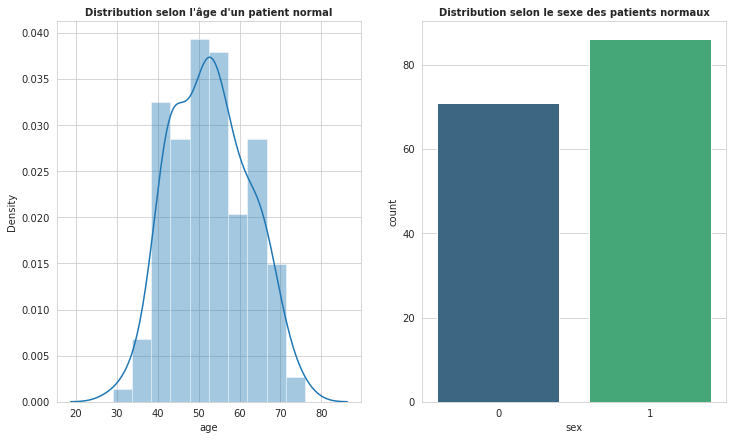

In [25]:
target_0=data[data['num']==0]
target_1=data[data['num']==1]
target_2=data[data['num']==2]
target_3=data[data['num']==3]
target_4=data[data['num']==4]

#Partie Visualisation

#Voyons la distribution selon l'âge des "patients normaux"
fig=plt.figure(figsize=(12,7))

#Cas des patients normaux (target=0)
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_0['age'])
plt.title("Distribution selon l'âge d'un patient normal",fontsize=10, weight='bold') 

#Gender distribution pour les "patients normaux"
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_0['sex'],palette='viridis')
plt.title("Distribution selon le sexe des patients normaux",fontsize=10,weight='bold')
plt.show()